In [2]:
%load_ext nb_black
import sys

sys.path.append("/Users/vikaspandey/my_projects/deeplearning_ai")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from optimizers.gradient_descent import GradientDescent
from data_visualisation.plot import Plot
from algorithms.lda import LDA

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

<IPython.core.display.Javascript object>

In [3]:
def plot():
    plots = [
        {
            "type": "scatter",
            "params": (
                "X",
                "Y",
                {
                    "axes_settings": {
                        "xlabel": "X",
                        "ylabel": "Y",
                        "title": "This is scatter plot",
                    }
                },
            ),
        },
        {
            "type": "scatter",
            "params": (
                "X",
                "predicted_y",
                {
                    "axes_settings": {
                        "xlabel": "X",
                        "ylabel": "Y",
                        "title": "This is scatter plot",
                    }
                },
            ),
        },
    ]
    p.plot_bulk(plots, single_figure=True, single_axes=True, figsize=(5, 3))


def callback(*argv):
    predictions, cost_history = argv
    df = pd.DataFrame(
        {"X": X.flatten(), "Y": Y.flatten(), "predicted_y": predictions.flatten()}
    )
    p.data = df
    plot()

<IPython.core.display.Javascript object>

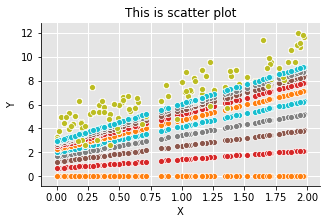

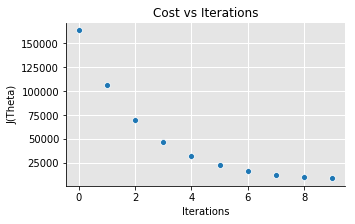

<IPython.core.display.Javascript object>

In [4]:
p = Plot(None)
X_b = np.c_[np.ones((len(X), 1)), X]
gd = GradientDescent(0.1, X_b, Y)
gd.iterations = 10
gd.theta = np.zeros((X_b.shape[1], 1))
gd.callback = callback
gd.optimise()

data = pd.DataFrame(
    {"iterations": range(gd.iterations), "cost_history": gd.cost_history}
)
p = Plot(data)
p.scatter(
    "iterations",
    "cost_history",
    axes_settings={
        "xlabel": "Iterations",
        "ylabel": "J(Theta)",
        "title": "Cost vs Iterations",
    },
    figure_size=(5, 3),
)

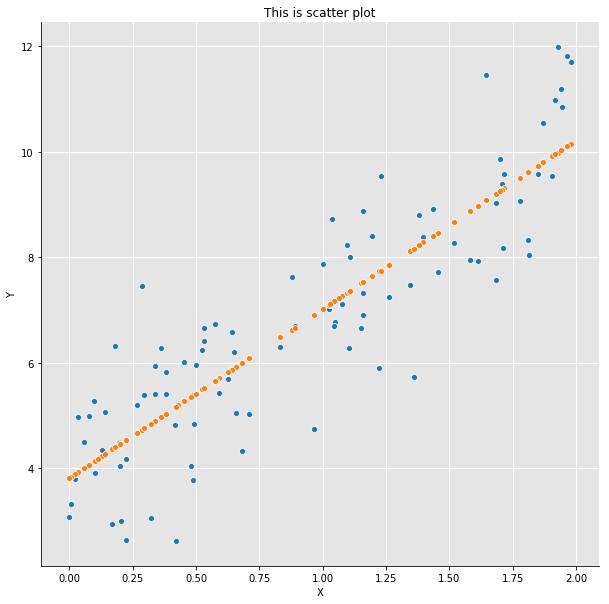

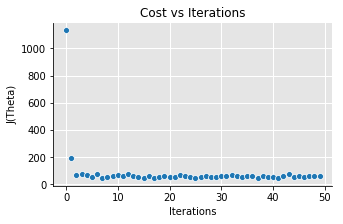

<IPython.core.display.Javascript object>

In [5]:
p = Plot(None)
X_b = np.c_[np.ones((len(X), 1)), X]
gd = GradientDescent(0.5, X_b, Y)
gd.iterations = 50
gd.theta = np.zeros((X_b.shape[1], 1))
gd.callback = callback
gd.optimise_sgd()
predictions = gd.predict()
df = pd.DataFrame(
        {"X": X.flatten(), "Y": Y.flatten(), "predicted_y": predictions.flatten()}
    )
p1 = Plot(df)
plots = [
    {
        "type": "scatter",
        "params": (
            "X",
            "Y",
            {
                "axes_settings": {
                    "xlabel": "X",
                    "ylabel": "Y",
                    "title": "This is scatter plot",
                }
            },
        ),
    },
    {
        "type": "scatter",
        "params": (
            "X",
            "predicted_y",
            {
                "axes_settings": {
                    "xlabel": "X",
                    "ylabel": "Y",
                    "title": "This is scatter plot",
                }
            },
        ),
    },
]
p1.plot_bulk(plots, single_axes=True)
data = pd.DataFrame(
    {"iterations": range(gd.iterations), "cost_history": gd.cost_history}
)
p2 = Plot(data)
p2.scatter(
    "iterations",
    "cost_history",
    axes_settings={
        "xlabel": "Iterations",
        "ylabel": "J(Theta)",
        "title": "Cost vs Iterations",
    },
    figure_size=(5, 3),
)


['iterations', 'cost_history']

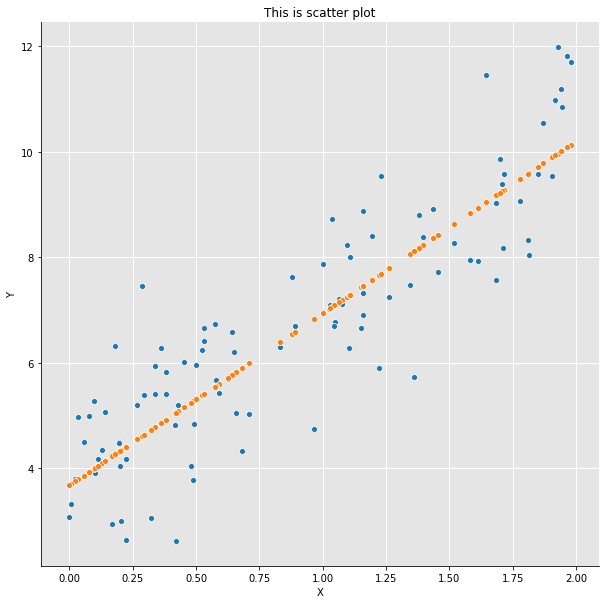

<IPython.core.display.Javascript object>

In [6]:
def cal_cost(theta, X, Y):
    m = len(Y)
    predictions = np.dot(X, theta)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - Y))
    return cost


def gradient(theta, X, Y):
    m = len(Y)
    return (1 / m) * (np.dot(X.T, np.dot(X, theta) - Y))


p1 = Plot(None)
X_b = np.c_[np.ones((len(X), 1)), X]
gd = GradientDescent(0.5, X_b, Y)
gd.iterations = 5
gd.theta = np.zeros((X_b.shape[1], 1))
gd.callback = callback
gd.optimise_mini_batch_gd(func=cal_cost, gradient=gradient)
predictions = gd.predict()
df_1 = pd.DataFrame(
    {"X": X.flatten(), "Y": Y.flatten(), "predicted_y": predictions.flatten()}
)
p2 = Plot(df_1)
plots = [
    {
        "type": "scatter",
        "params": (
            "X",
            "Y",
            {
                "axes_settings": {
                    "xlabel": "X",
                    "ylabel": "Y",
                    "title": "This is scatter plot",
                }
            },
        ),
    },
    {
        "type": "scatter",
        "params": (
            "X",
            "predicted_y",
            {
                "axes_settings": {
                    "xlabel": "X",
                    "ylabel": "Y",
                    "title": "This is scatter plot",
                }
            },
        ),
    },
]
p2.plot_bulk(plots, single_axes=True)
data_1 = pd.DataFrame(
    {"iterations": range(gd.iterations), "cost_history": gd.cost_history}
)
data_1["cost_history"][0]

list(data_1.columns)
# p3 = Plot(data_1)
# p3.scatter(
#     "iterations",
#     "cost_history",
#     axes_settings={
#         "xlabel": "Iterations",
#         "ylabel": "J(Theta)",
#         "title": "Cost vs Iterations",
#     },
#     figure_size=(5, 3),
# )

In [24]:
data = np.zeros([0 for x in range(5)])

<IPython.core.display.Javascript object>

In [25]:
data

array([], shape=(0, 0, 0, 0, 0), dtype=float64)

<IPython.core.display.Javascript object>

In [31]:
np1 = np.ones((3, 4))
np2 = np.ones((2, 4))
np1.add(np2)

AttributeError: 'numpy.ndarray' object has no attribute 'add'

<IPython.core.display.Javascript object>

In [2]:
wine = load_wine()

<IPython.core.display.Javascript object>

In [ ]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.DataFrame({"label": wine.target})

lda = LDA(X, y)
lda.fit()


/Users/vikaspandey/miniconda2/envs/datascience/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


--Return--
> /Users/vikaspandey/my_projects/deeplearning_ai/algorithms/lda.py(35)calculate_eigen_values()->None
-> pdb.set_trace()
(Pdb) eigvals.shape
(13,)
(Pdb) eigvals
array([ 6.78400287e+00+0.00000000e+00j, -7.70461169e-18+0.00000000e+00j,
        4.20352404e-01+0.00000000e+00j, -6.48411748e-17+1.14897766e-16j,
       -6.48411748e-17-1.14897766e-16j,  7.85185651e-17+0.00000000e+00j,
       -4.03172606e-17+0.00000000e+00j, -3.77313421e-18+0.00000000e+00j,
        2.33258034e-18+2.41067568e-18j,  2.33258034e-18-2.41067568e-18j,
       -1.62821451e-18+0.00000000e+00j,  4.32694010e-19+0.00000000e+00j,
        1.07935521e-19+0.00000000e+00j])
(Pdb) eigvec.shape
(13, 13)


In [12]:
class_feature_means = pd.DataFrame(columns=wine.target_names)

<IPython.core.display.Javascript object>

In [13]:
class_feature_means

,class_0,class_1,class_2


<IPython.core.display.Javascript object>

In [16]:
for c, rows in df.groupby("class"):
    class_feature_means[c] = rows.mean()

<IPython.core.display.Javascript object>

In [18]:
class_feature_means.shape

(13, 3)

<IPython.core.display.Javascript object>

In [ ]:
within_class_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    s = np.zeros((13,13))
for index, row in rows.iterrows():
    x, mc = row.values.reshape(13,1), class_feature_means[c].values.reshape(13,1)
    import pdb
    pdb.set_trace()
    s += (x - mc).dot((x - mc).T)
    within_class_scatter_matrix += s
within_class_scatter_matrix.shape

> <ipython-input-22-ff2762c37a25>(9)<module>()
-> s += (x - mc).dot((x - mc).T)
(Pdb) x
array([[1.286e+01],
       [1.350e+00],
       [2.320e+00],
       [1.800e+01],
       [1.220e+02],
       [1.510e+00],
       [1.250e+00],
       [2.100e-01],
       [9.400e-01],
       [4.100e+00],
       [7.600e-01],
       [1.290e+00],
       [6.300e+02]])
(Pdb) x.shape
(13, 1)
(Pdb) mc
array([[1.31537500e+01],
       [3.33375000e+00],
       [2.43708333e+00],
       [2.14166667e+01],
       [9.93125000e+01],
       [1.67875000e+00],
       [7.81458333e-01],
       [4.47500000e-01],
       [1.15354167e+00],
       [7.39624998e+00],
       [6.82708333e-01],
       [1.68354167e+00],
       [6.29895833e+02]])
(Pdb) mc.shape
(13, 1)


In [2]:
from algorithms.decision_tree_classifier import DecisionTreeClassifier
from sklearn.datasets import load_iris
from pprint import pprint

iris = load_iris()

x = iris.data
y = iris.target

clf = DecisionTreeClassifier(7)
tree = clf.fit(x, y)
pprint(tree)

IndexError: arrays used as indices must be of integer (or boolean) type

<IPython.core.display.Javascript object>

In [3]:
print (get_entropy_of_a_single_node([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]))

0.39124356362925566


In [1]:
4/13

0.3076923076923077